In [28]:
# Load packages necessary for the computations below
from numpy import ones_like, exp, array
from numpy.random import uniform, gamma
import matplotlib
import scipy.special as sps
font = {'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('font', **font)
from numpy import sqrt
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge
from matplotlib.collections import PatchCollection
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset# make font huge for beamer
!pip install sobol_seq
!pip install ghalton


def visualize(x, y, name):
    fig, ax = plt.subplots(figsize=(10, 10))
    inside = x ** 2 + y ** 2 <= 1.0
    ax.scatter(x[inside], y[inside], c='green', s=3, marker='^')
    ax.scatter(x[~inside], y[~inside], c='red', s=3)
    estimate = sum(inside) / len(inside) * 4
    ax.set_title(
        "Approximating $\pi$ with {} samples as {:f}".format(name, estimate),
        y=1.08)
    p = PatchCollection([Wedge((0, 0), 1, 0, 360)], alpha=0.1)
    ax.add_collection(p)
    axins = zoomed_inset_axes(ax, 2.5, loc=3)  # zoom = 6
    axins.axis([1.4, 1.1, 1.4, 1.1])
    axins.scatter(x[inside], y[inside], c='green', s=50, marker='^')
    axins.scatter(x[~inside], y[~inside], c='red', s=50)
    p = PatchCollection([Wedge((0, 0), 1, 0, 360)], alpha=0.1)
    axins.add_collection(p)
    axins.set_xlim(1 / sqrt(2), 1 / sqrt(2) + 0.2)  # Limit the region for zoom
    axins.set_ylim(1 / sqrt(2) - 0.2, 1 / sqrt(2))
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])

    plt.xticks(visible=False)  # Not present ticks
    plt.yticks(visible=False)
    #
    ## draw a bbox of the region of the inset axes in the parent axes and
    ## connecting lines between the bbox and the inset axes area
    mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5", linewidth=3)
    

----
## 1) Uniformly distributed random variables
Create some samples from a uniform distribution and compare 
with statistical quantities.



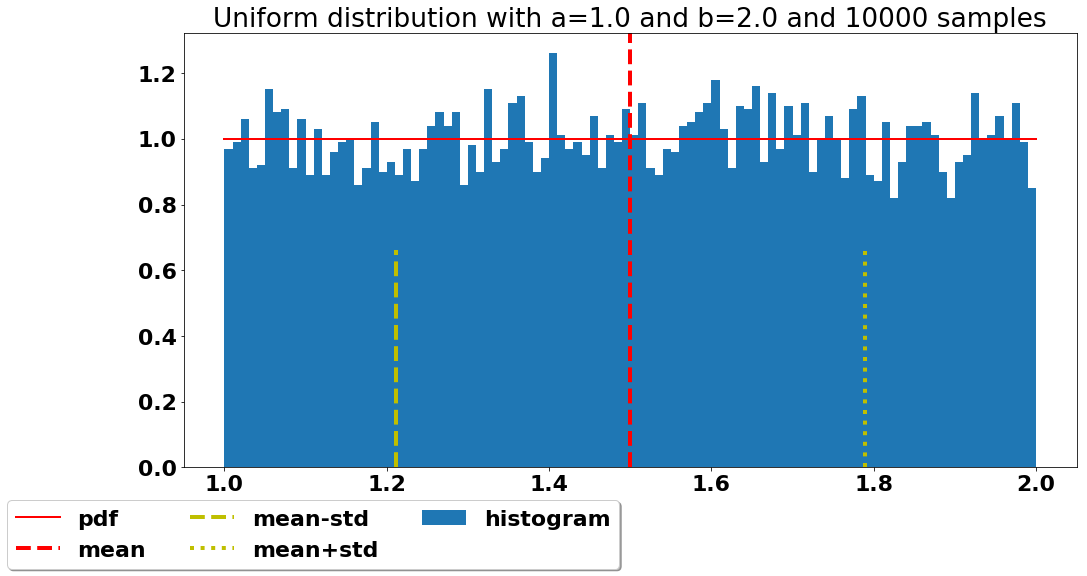

In [29]:
nsamples = 10000
nbins = 100
a, b = 1.0, 2.0
s = uniform(a,b,nsamples)
fig, ax = plt.subplots(figsize=(16,8))
count, bins, ignored = ax.hist(s, nbins, density=True)
ax.plot(bins, ones_like(bins)/(b-a), linewidth=2, color='r')
mean = (b+a)/2
var = (b-a)**2/12
ax.axvline(mean, linewidth=4, color='r', linestyle="--")
ax.axvline(mean-sqrt(var),0,0.5,linewidth=4, color='y', linestyle="--")
ax.axvline(mean+sqrt(var),0,0.5,linewidth=4, color='y', linestyle=":")
ax.legend(["pdf","mean","mean-std","mean+std","histogram"],bbox_to_anchor=(0.5, -0.05),shadow=True, ncol=3);
ax.set_title("Uniform distribution with a={} and b={} and {} samples".format(a,b,nsamples));

-----
## 2) Gamma distributed random variables
Create some samples from a Gamma distribution and compare 
with statistical quantities.


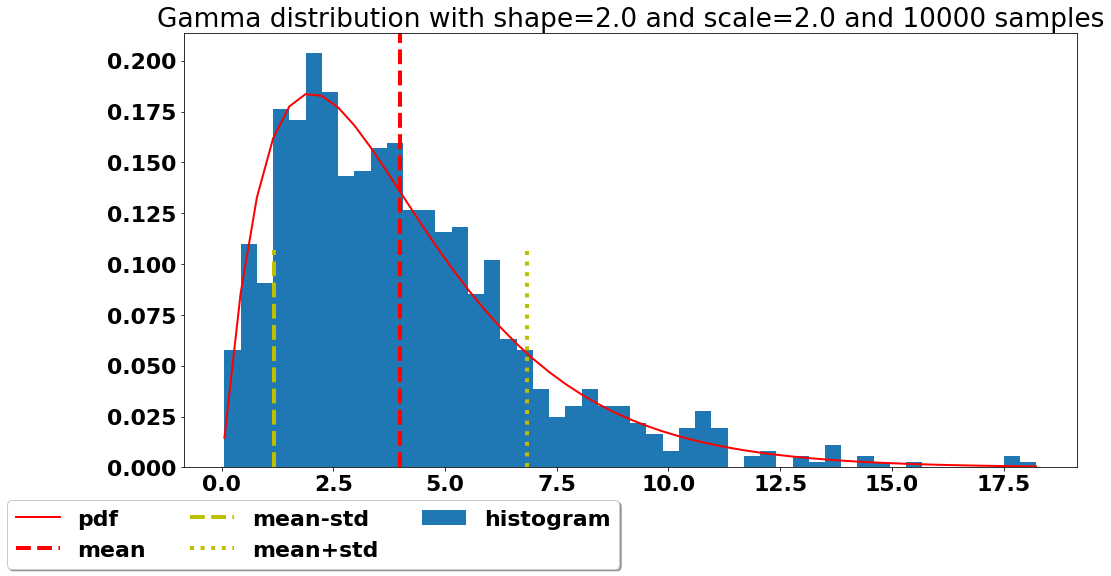

In [30]:
shape, scale = 2., 2.  # mean=4, std=2*sqrt(2)
s = gamma(shape, scale, 1000)
fig, ax = plt.subplots(figsize=(16,8))
count, bins, ignored = ax.hist(s, 50, density=True)
y = bins**(shape-1)*(exp(-bins/scale) /
        (sps.gamma(shape)*scale**shape))
ax.plot(bins, y, linewidth=2, color='r');
mean = shape*scale
var = shape*scale**2
ax.axvline(mean, linewidth=4, color='r', linestyle="--")
ax.axvline(mean-sqrt(var),0,0.5,linewidth=4, color='y', linestyle="--")
ax.axvline(mean+sqrt(var),0,0.5,linewidth=4, color='y', linestyle=":")
ax.legend(["pdf","mean","mean-std","mean+std","histogram"],bbox_to_anchor=(0.5, -0.05),shadow=True, ncol=3);
ax.set_title("Gamma distribution with shape={} and scale={} and {} samples".format(shape,scale, nsamples));

----
## 3) Approximating $\pi$ with Monte Carlo


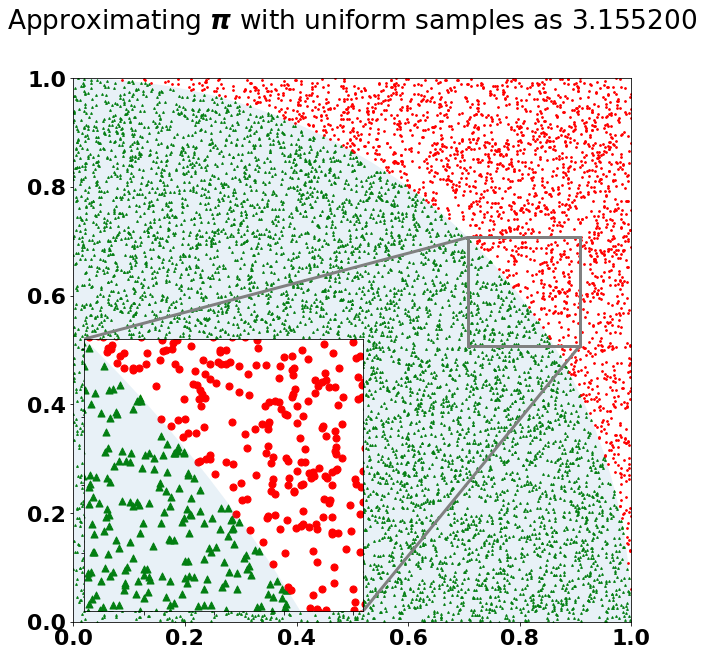

In [31]:
# With uniform samples
x = uniform(0,1,10000)
y = uniform(0,1,10000)
visualize(x,y,'uniform')

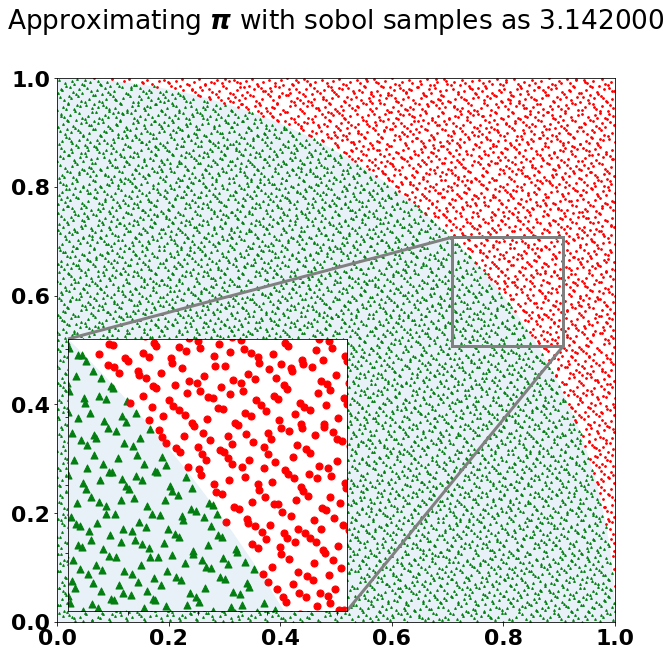

In [32]:
import sobol_seq
vec, seed = sobol_seq.i4_sobol(4, 1)
samples = sobol_seq.i4_sobol_generate(2, 10000)
x = samples[:,0]
y = samples[:,1]
visualize(x,y,'sobol')


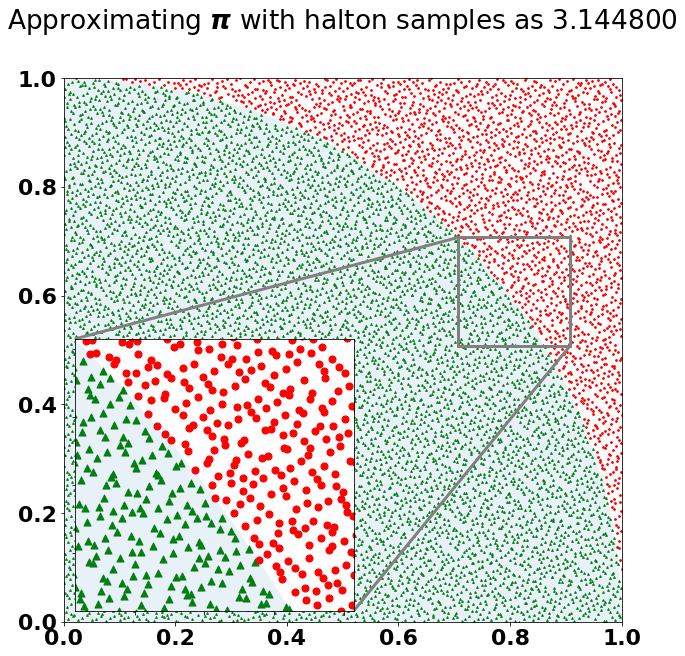

In [33]:
import ghalton
sequencer = ghalton.Halton(2) # two dimensions
samples = array(sequencer.get(10000))
x = samples[:,0]
y = samples[:,1]
visualize(x,y,'halton')

